In [101]:
import pandas as pd
from hmmlearn.hmm import GaussianHMM
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [75]:
df = pd.read_csv("/content/data-kiem-tra-1.csv")
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1
...,...,...,...,...,...,...
481817,03.05.2013,4,37,2437,799.00,1
481818,22.05.2013,4,37,2436,799.00,1
481819,03.05.2013,4,37,2436,799.00,1
481820,18.05.2013,4,37,2416,449.00,1


In [76]:
df.dtypes

date         object
truong_1      int64
truong_2      int64
truong_3      int64
truong_4    float64
truong_5      int64
dtype: object

In [77]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df.dtypes

date        datetime64[ns]
truong_1             int64
truong_2             int64
truong_3             int64
truong_4           float64
truong_5             int64
dtype: object

In [78]:
df = df.groupby('date').sum().reset_index()

In [79]:
df.set_index('date', inplace=True)

In [80]:
train_df = df[:-15]
test_df = df[-15:]
model_hmm = GaussianHMM(n_components=4, covariance_type="full", random_state=42)
model_hmm.fit(train_df['truong_2'].values.reshape(-1,1))

predicted_prices = []
current_price = train_df['truong_2'].values[-1]

for _ in range(len(test_df)):
    # Dự đoán trạng thái ẩn cho giá trị hiện tại
    current_state = model_hmm.predict([[current_price]])[0]
    # Lấy giá trị trung bình của trạng thái hiện tại để làm dự đoán cho bước tiếp theo
    predicted_price = np.random.normal(model_hmm.means_[current_state][0], np.sqrt(model_hmm.covars_[current_state][0][0]))
    predicted_prices.append(predicted_price)
    # Cập nhật giá trị hiện tại
    current_price = predicted_price
print(predicted_prices)

[87040.61836050861, 100910.53560886919, 86586.7748704179, 94274.46362883828, 98167.75548096595, 76194.83464432663, 98722.49321034377, 63049.97337850511, 92002.97044942061, 114141.92721016562, 96360.11956070979, 87320.3558461518, 109794.76722472087, 116616.89892884798, 85557.84537302033]


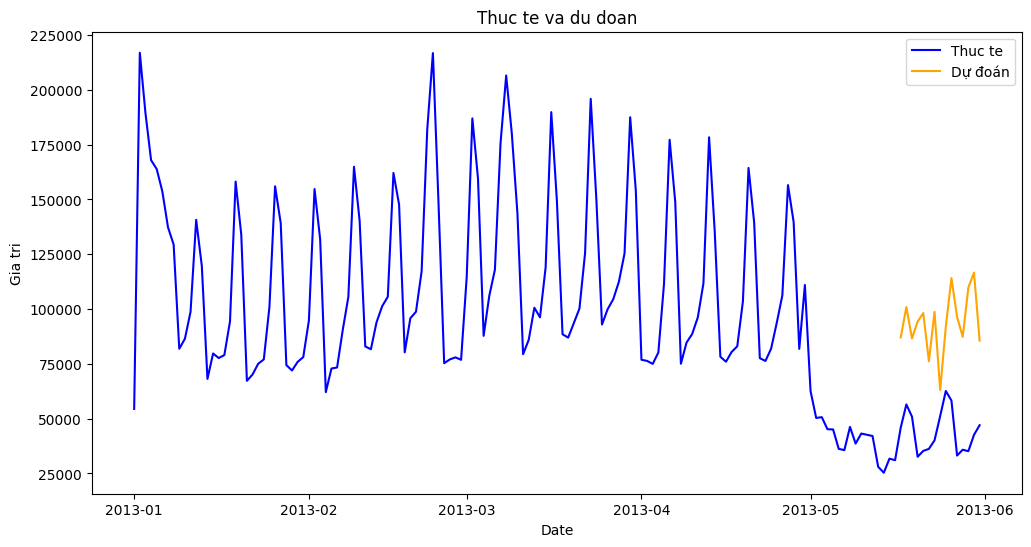

In [81]:
predicted_prices_df = pd.DataFrame(predicted_prices, index=test_df.index, columns=['predicted_sales'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_2'], label='Thuc te', color='blue')

plt.plot(predicted_prices_df['predicted_sales'], label='Dự đoán', color='orange')

plt.xlabel('Date')
plt.ylabel('Gia tri')
plt.title('Thuc te va du doan')
plt.legend()
plt.show()

In [82]:
model_autoARIMA = auto_arima(train_df['truong_2'].values.reshape(-1,1), start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3232.229, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3232.799, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3225.726, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3230.235, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3216.777, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3183.999, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3208.424, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3185.814, Time=0.25 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3224.961, Time=0.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3223.845, Time=0.28 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3210.434, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3179.392, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3214.790, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

In [86]:
model = ARIMA(train_df['truong_2'].values.reshape(-1,1), order=(2,1,1))
fitted = model.fit()

In [88]:
forecast = fitted.forecast(steps=15)
print(forecast)

[39814.34001418 46789.77197384 47498.46974089 44422.26163307
 41738.25636526 41308.52014414 42373.88599283 43398.80310617
 43619.4789991  43255.27475493 42866.72103742 42762.52323728
 42885.12509939 43031.40420746 43078.14130598]


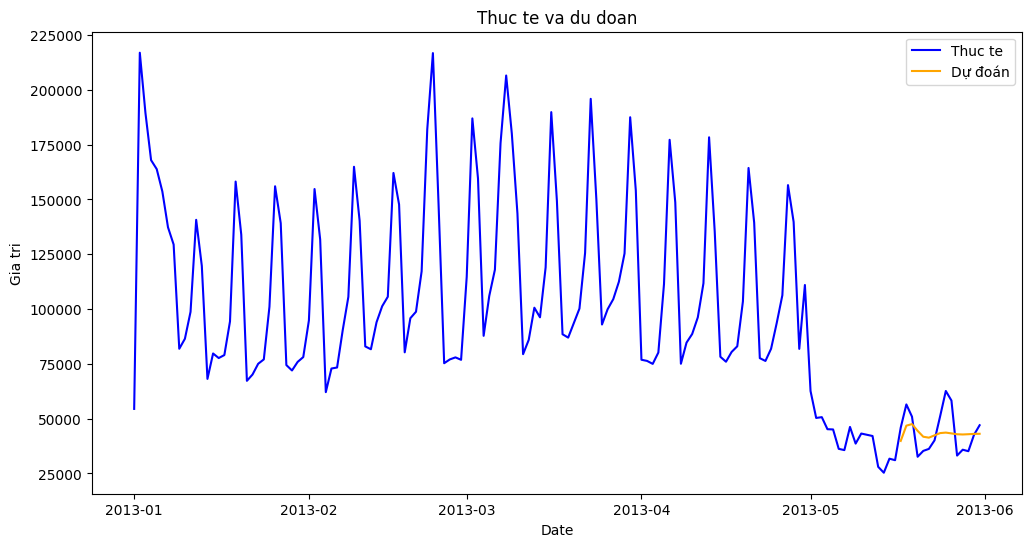

In [89]:
predicted_prices_df = pd.DataFrame(forecast, index=test_df.index, columns=['predicted_sales'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_2'], label='Thuc te', color='blue')

plt.plot(predicted_prices_df['predicted_sales'], label='Dự đoán', color='orange')

plt.xlabel('Date')
plt.ylabel('Gia tri')
plt.title('Thuc te va du doan')
plt.legend()
plt.show()

In [93]:
SARIMA_model = auto_arima(train_df["truong_2"].values.reshape(-1,1), start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3,
                         m=12, #12 is the frequncy of the cycle
                         start_P=0,
                         seasonal=True, #set to seasonal
                         d=None,
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)
print(SARIMA_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  136
Model:             SARIMAX(0, 0, 2)x(0, 1, [1], 12)   Log Likelihood               -1473.670
Date:                              Tue, 04 Jun 2024   AIC                           2955.340
Time:                                      01:59:18   BIC                           2966.621
Sample:                                           0   HQIC                          2959.922
                                              - 136                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.0071      0.153      6.574      0.000       0.707       1.307
ma.L2          0.30

In [106]:
sarima = SARIMAX(train_df['truong_2'].values.reshape(-1,1),
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().forecast(steps=15)

In [107]:
print(predictions)

[32591.70931721 31536.53637742 38406.86018737 50150.88129646
 76599.77283464 68595.47464995 34302.53695805 51217.36854559
 16970.0702486   8633.95897084 11485.79208215  7967.83883027
  8542.10243556  2903.99509904  5390.53407944]


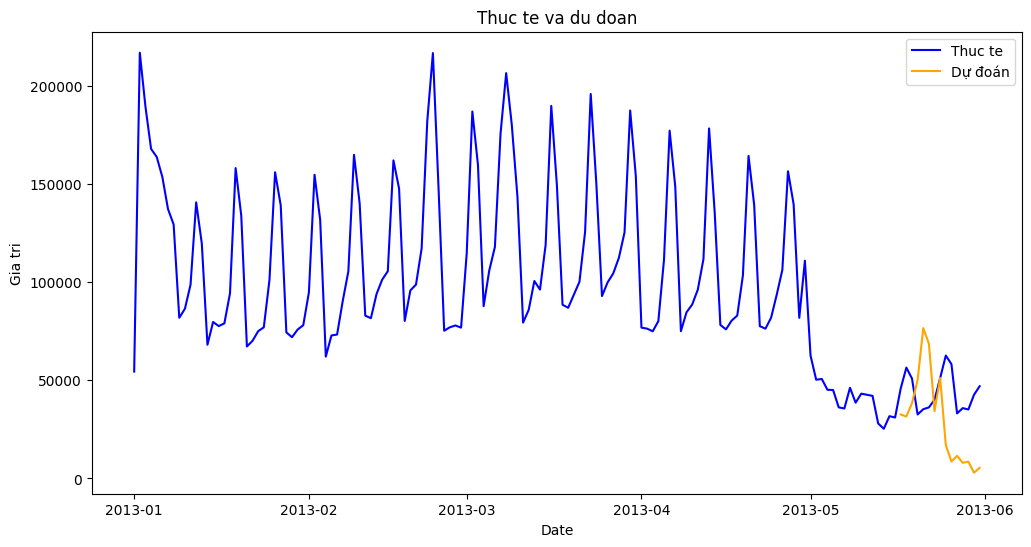

In [108]:
predicted_prices_df = pd.DataFrame(predictions, index=test_df.index, columns=['predicted_sales'])

plt.figure(figsize=(12, 6))

plt.plot(df['truong_2'], label='Thuc te', color='blue')

plt.plot(predicted_prices_df['predicted_sales'], label='Dự đoán', color='orange')

plt.xlabel('Date')
plt.ylabel('Gia tri')
plt.title('Thuc te va du doan')
plt.legend()
plt.show()